# Лабораторна робота №5

In [20]:
import pandas as pd
import numpy as np
from string import digits
import matplotlib.pyplot as plt

## Завдання №1
Загрузити файл з даними про споживання енергії ``En_In.xls``, який являє
собою перелік показників енергозабезпечення та виробництва відновлюваної
електроенергії, і ввести їх в DataFrame.
### Код завдання:

In [21]:
cons = pd.read_excel('En_In.xls', header=16)
cons['Country'] = cons['Unnamed: 1']
cons = cons[['Country', 'Energy Supply', 'Energy Supply per capita', 'Renewable Electricity Production']][1:228]
cons

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,321,10,78.66928
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.69565
...,...,...,...,...
223,Viet Nam,2554,28,45.32152
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344,13,0
226,Zambia,400,26,99.71467


## Завдання №2
Переведіть дані із стовпчику ``Energy Supply`` в гДж (Примітка: в 1ПДж
= 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з
``.....``), переконайтеся, що це відображається як значення np.NaN.
### Код завдання:

In [22]:
cons = cons.replace(r'\.', np.nan, regex=True)
cons['Energy Supply'] = cons['Energy Supply']*(10**6)
cons

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2.554000e+09,28.0,45.321520
224,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
225,Yemen,3.440000e+08,13.0,0.000000
226,Zambia,4.000000e+08,26.0,99.714670


## Завдання №3
Перейменуйте наступний список країн:
- ``Republic of Korea``: ``South Korea``,
- ``United States of America``: ``United States``,
- ``United Kingdom of Great Britain and Northern Ireland``: ``United Kingdom``,
- ``China, Hong Kong Special Administrative Region``: ``Hong Kong``
### Код завдання:

In [23]:
renameDict = {'Korea, Rep.': 'South Korea',
              'Iran, Islamic Rep.': 'Iran',
              'Iran (Islamic Republic of)': 'Iran',
              'Hong Kong SAR, China': 'Hong Kong',
              'Republic of Korea': 'South Korea',
              'United States of America': 'United States',
              'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
              'China, Hong Kong Special Administrative Region': 'Hong Kong'}
cons = cons.replace(renameDict)
cons

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2.554000e+09,28.0,45.321520
224,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
225,Yemen,3.440000e+08,13.0,0.000000
226,Zambia,4.000000e+08,26.0,99.714670


## Завдання №5
Завантажте дані про ВВП з файлу ``gpd.csv``, що містить дані
Світового банку про ВВП країн від 1960 до 2015 року.
Обов’язково не включайте заголовок до датафрейму і перейменуйте
наступний список країн:
- ``Korea, Rep.``: ``South Korea``,
- ``Iran, Islamic Rep.``: ``Iran``,
- ``Hong Kong SAR, China``: ``Hong Kong``;
### Код завдання:

In [24]:
gpd = pd.read_csv('gpd.csv', header=4)
gpd = gpd.replace(renameDict)
gpd = gpd.rename(columns={"Country Name": "Country"})
gpd = pd.concat([gpd.iloc[:, :4], gpd.iloc[:, 50:]], axis=1)
gpd

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


## Завдання №6
Завантажте дані з файлу ``scimagojr.xlsx``, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.
### Код завдання:

In [25]:
scimagojr = pd.read_excel('scimagojr.xlsx')[:15].replace(renameDict)
scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


## Завдання №7
Приєднайте три набори даних із завдань 1-6 до нового набору даних
(використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути [&#39;Rank&#39;, &#39;Documents&#39;, &#39;Citable documents&#39;, &#39;Citations&#39;, &#39;Self-citations&#39;,
&#39;Citations per document&#39;, &#39;H index&#39;, &#39;Energy Supply&#39;, &#39;Energy Supply per Capita&#39;, &#39;%
Renewable&#39;, &#39;2006&#39;, &#39;2007&#39;, &#39;2008&#39;, &#39;2009&#39;, &#39;2010&#39;, &#39;2011&#39;, &#39;2012&#39;, &#39;2013&#39;, &#39;2014&#39;,
&#39;2015&#39;].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.
### Код завдання:

In [27]:
df = pd.merge(scimagojr, cons, on="Country", how='outer')
df = pd.merge(df, gpd, on="Country", how='outer')
df = df.set_index("Country")
df = df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])[:15]
df.shape

(15, 20)

## Завдання №8
Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
### Код завдання:

In [28]:
years = [2006, 2007, ]
years = [str(x) for x in range(2006, 2016)]
df[years].mean(axis=1, skipna=True).sort_values(ascending=False)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

## Завдання №9
Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10
років для країни з 5-м середнім ВВП.
### Код завдання:

In [29]:
"France", df.loc["France"]['2015'] - df.loc["France"]['2006']

('France', 153345695364.24023)

## Завдання №10
Створіть функцію, щоб визначити, в якій країні встановлено максимум
поновлюваних джерел енергії (% Renewable) та який саме відсоток.
### Код завдання:

In [30]:
res = list(df.sort_values("Renewable Electricity Production", ascending=False).index.values)[0]
res, df.loc[res]["Renewable Electricity Production"]

('Brazil', 69.64803)

## Завдання №11
Створіть стовпець, в якому оцінюється чисельність населення. Для
пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita).
### Код завдання:

In [31]:
df["Population"] = df["Energy Supply"] / df["Energy Supply per capita"]
res = list(df["Population"].sort_values(ascending=False).index.values)[5]
res, df.loc[res]["Population"]

('Japan', 127409395.97315437)

## Завдання №12
Створіть стовпець, в якому оцінюється кількість цитованих документів на
одну особу. Який взаємозв&#39;язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте
метод ``.corr()`` (кореляція Пірсона).
### Код завдання:

In [32]:
df["CitPerCap"] = df["Citable documents"] / df["Population"]
df["Energy Supply per capita"].corr(df['CitPerCap'], method="pearson")

0.7940010435442947

## Завдання №13
Створіть новий стовпчик в який занесіть 1, якщо значення %
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.
### Код завдання:

In [33]:
temp = df["Renewable Electricity Production"].median(axis=0)
df["renew"] = df.apply(lambda x: 1 if x["Renewable Electricity Production"] > temp else 0, axis=1)
df.sort_values(by='Rank')
df["renew"]

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: renew, dtype: int64

## Завдання №14
Використайте наступний словник, щоб згрупувати країни за
континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне
відхилення для оцінки кількості населення для кожної країни.
### Код завдання:

In [34]:
ContinentDict = {'China': 'Asia',
                'United States': 'North America',
                'Japan': 'Asia',
                'United Kingdom': 'Europe',
                'Russian Federation': 'Europe',
                'Canada': 'North America',
                'Germany': 'Europe',
                'India': 'Asia',
                'France': 'Europe',
                'South Korea': 'Asia',
                'Italy': 'Europe',
                'Spain': 'Europe',
                'Iran': 'Asia',
                'Australia': 'Australia',
                'Brazil': 'South America'}
df['Population'] = df['Energy Supply'] / df['Energy Supply per capita']
temp = df.groupby(ContinentDict).agg({'Population': ['sum', 'mean', 'std'], 'Renewable Electricity Production': 'mean'})
temp

Population                              \
                        sum          mean           std   
Asia           2.898666e+09  5.797333e+08  6.790979e+08   
Australia      2.331602e+07  2.331602e+07           NaN   
Europe         4.579297e+08  7.632161e+07  3.464767e+07   
North America  3.528552e+08  1.764276e+08  1.996696e+08   
South America  2.059153e+08  2.059153e+08           NaN   

              Renewable Electricity Production  
                                          mean  
Asia                                 10.588777  
Australia                            11.810810  
Europe                               22.407797  
North America                        36.758205  
South America                        69.648030

## Завдання №15
Створіть бульбашкову діаграму, що відображає залежність %
поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір
бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.
### Код завдання:

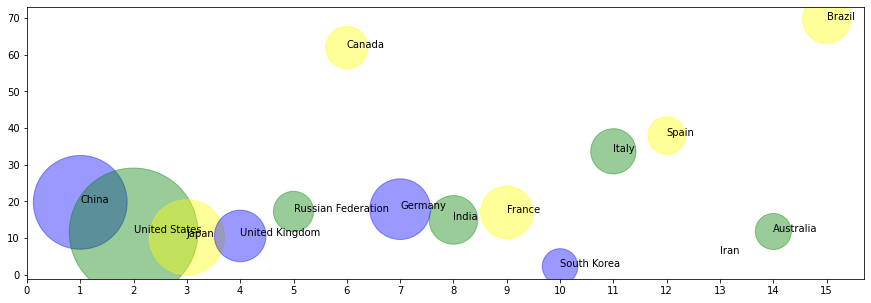

In [36]:
colors = ['blue', 'green', 'yellow'] * 5
x, y = df["Rank"], df["Renewable Electricity Production"]
for i, text in enumerate(list(df.index)):
    plt.annotate(text, (x[i], y[i]))
plt.scatter(x=x, y=y, s=df['2015'] / 1000000000, alpha=0.4, c=colors)
plt.xticks([i for i in range(0, len(list(df.index)) + 1)])
plt.gcf().set_size_inches((15, 5))
plt.show()